# 2. The Factor

<p style="font-size:28px;">1. Analyze the factors, similar to how you analyzed the three Fama-French factors in Homework 4.</p>

You now have three additional factors, so let’s compare there univariate statistics.

-mean

-volatility

-Sharpe

In [1]:
import numpy as np
import pandas as pd
import statistics
data_orginal=pd.read_excel('factor_pricing_data_monthly.xlsx', sheet_name='factors (excess returns)')
data=data_orginal.copy()
data.drop(['Date'],axis=1, inplace=True)
data.dropna(inplace=True)
data


,MKT,SMB,HML,RMW,CMA,UMD
0,0.0550,0.0188,0.0185,-0.0184,0.0189,0.0745
1,-0.0123,-0.0162,0.0059,-0.0095,0.0292,0.0789
2,-0.1289,-0.0697,-0.0096,0.0182,-0.0105,-0.0958
3,0.0396,0.0105,0.0103,-0.0218,0.0034,-0.0048
4,0.0526,0.0200,0.0038,0.0043,-0.0063,-0.0118
...,...,...,...,...,...,...
543,-0.0084,-0.0186,-0.0340,-0.0285,-0.0267,0.0497
544,0.0606,-0.0072,-0.0288,0.0126,0.0251,0.0221
545,0.0486,-0.0002,-0.0160,-0.0319,0.0145,-0.0264
546,0.0198,-0.0015,-0.0127,-0.0029,-0.0207,-0.0096


In [2]:
#Function to calculate statistics- Mean, Vol, Sharpe, Var
def stat(data,period):
    Annualized_mean = pd.Series(np.nan, index=data.columns)
    vol = pd.Series(np.nan, index=data.columns)
    sharpe = pd.Series(np.nan, index=data.columns)
    sorted_data=data.sort_values(by=list(data.columns), na_position="first")
    var = pd.Series(np.nan, index=data.columns)
    for col in data.columns:
        Annualized_mean[col]=data[col].mean() * period
        vol[col]=data[col].std() * np.sqrt(period)
        sharpe[col]=Annualized_mean[col] / vol[col]
        var[col]=np.quantile(sorted_data[col], 0.05,axis=0).T
    return Annualized_mean,vol,sharpe,var
Annual_mean,sigma,sharpe_ratio,var_5= stat(data,12)
df_stat= pd.DataFrame({"Annualized Mean":Annual_mean,"Volatility": sigma,'Sharpe Ratio':sharpe_ratio,'Var(0.05)':var_5})
df_stat


,Annualized Mean,Volatility,Sharpe Ratio,Var(0.05)
MKT,0.087552,0.156142,0.560718,-0.072430
SMB,0.006120,0.101274,0.060435,-0.043095
HML,0.026039,0.108835,0.239249,-0.042090
RMW,0.044047,0.082931,0.531132,-0.028500
CMA,0.028288,0.072480,0.390284,-0.027795
UMD,0.060313,0.153352,0.393299,-0.067295


In [3]:
START_YR=2015
df_subsample = data_orginal[(data_orginal['Date'].dt.year>= START_YR)]
df_subsample.drop(['Date'],axis=1, inplace=True)
df_subsample.dropna(inplace=True)
Annual_mean_sample,sigma_sample,sharpe_ratio_sample,var_5_sample= stat(df_subsample,12)
df_stat_sample= pd.DataFrame({"Annualized Mean":Annual_mean_sample,"Volatility": sigma_sample,'Sharpe Ratio':sharpe_ratio_sample,'Var(0.05)':var_5_sample})
df_stat_sample

C:\Users\ABC\AppData\Local\Temp\ipykernel_15816\2481077862.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subsample.drop(['Date'],axis=1, inplace=True)
C:\Users\ABC\AppData\Local\Temp\ipykernel_15816\2481077862.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subsample.dropna(inplace=True)


,Annualized Mean,Volatility,Sharpe Ratio,Var(0.05)
MKT,0.117872,0.157356,0.749078,-0.073880
SMB,-0.023775,0.103166,-0.230455,-0.043765
HML,-0.016303,0.129885,-0.125520,-0.049195
RMW,0.040012,0.072632,0.550896,-0.027800
CMA,-0.009141,0.082072,-0.111373,-0.030385
UMD,0.020119,0.137387,0.146438,-0.060645


<p style="font-size:28px;">2. Based on the factor statistics above, answer the following.</p>

**Does each factor have a positive risk premium (positive expected excess return)?**  
*All 6 factors have positive expected excess return for full sample*

**How have the factors performed since the time of the case, (2015-present)?**  
*Since 2015, the average returns of all factors have declined, with SMB, HML, and CMA in particular showing negative average performance over this period.*

<p style="font-size:28px;">3. Report the correlation matrix across the six factors.</p>



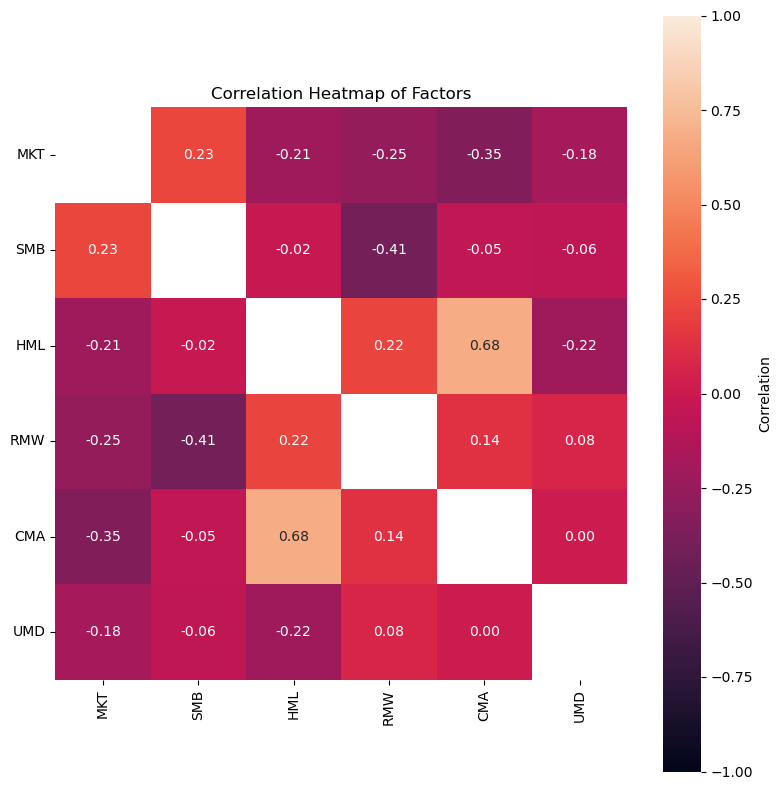

In [4]:
def correlation_matrix(data):
    data_corr=data.corr()
    import matplotlib.pyplot as plt
    import seaborn as sns
    np.fill_diagonal(data_corr.values, np.nan)
    plt.figure(figsize=(8, 8))
    ax = sns.heatmap(
        data_corr,
        annot=True,        
        fmt=".2f",         
        vmin=-1, vmax=1,   
        square=True,       
        cbar_kws={"label": "Correlation"}
    )
    ax.set_title("Correlation Heatmap of Factors")
    plt.xticks(rotation=90, ha="center")
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
correlation_matrix(data)

**Does the construction method succeed in keeping correlations small?**  
*Yes, the correlation are relatively small.*

**Fama and French say that HML is somewhat redundant in their 5-factor model. Does this seem to be the case?**  
*HML has the highest correlation in the matrix with CMA, which implies certain movement similarity with Investments.*

<p style="font-size:28px;">4. Report the tangency weights for a portfolio of these 6 factors.</p>

In [5]:
#Covariance Matrix
cov_matrix=data.cov() *12 #Annualizing the Covariance
inv_cov_matrix = np.linalg.inv(cov_matrix)

Weigths=np.dot(inv_cov_matrix,Annualized_mean)
sum_weights=sum(Weigths)
const =1/sum_weights
scaled_weights=Weigths*const
tangency_weights = pd.DataFrame(scaled_weights, index=data.columns, columns=['Tangency Weights'])
tangency_weights=pd.concat([tangency_weights, df_stat['Annualized Mean']], axis=1)
tangency_weights

NameError: name 'Annualized_mean' is not defined


**Which factors seem most important? And Least?**  
*Investment, CMA, has the highest weight and HML has the least weight, therefore, CMA amd HML, are most and least important, respectively.*

**Are the factors with low mean returns still useful?**
*Factors like SMB and HML, have the lowest means and weights in the tangency portfolio.*

<p style="font-size:28px;">Re-do the tangency portfolio, but this time only include MKT, SMB, HML, and UMD.</p>

In [ ]:
#MKT,SMB,HML, and UMD
data_new=data.drop(['RMW','CMA'],axis=1)

cov_matrix=data_new.cov() *12 #Annualizing the Covariance
inv_cov_matrix = np.linalg.inv(cov_matrix)

Weigths=np.dot(inv_cov_matrix,data_new.mean()*12)
sum_weights=sum(Weigths)
const =1/sum_weights
scaled_weights=Weigths*const
tangency_weights = pd.DataFrame(scaled_weights, index=data_new.columns, columns=['Tangency Weights'])
tangency_weights

,Tangency Weights
MKT,0.376514
SMB,-0.051198
HML,0.365321
UMD,0.309363


**Which factors get high/low tangency weights now?**  
*MKT has the highest weight and SMB has the lowest mean.*

**What do you conclude about the importance or unimportance of these styles?**
*Momentum and the market factor remain important return drivers. Size (SMB) factors appear weaker in recent data. In absence of RMW and CMA, HML becomes a stronger driver.*


# 3. Testing Modern LPMs

Consider the following factor models:  

-CAPM: MKT  

-Fama-French 3F: MKT, SMB, HML  

-Fama-French 5F: MKT, SMB, HML, RMW, CMA  

-AQR: MKT, HML, RMW, UMD  

Our labeling of the last model as the AQR is just for concreteness. The firm is well-known for these factors and an unused case study discusses that further.

<p style="font-size:28px;">1. Test the AQR 4-Factor Model using the time-series test.</p>   
(We are not doing the cross-sectional regression tests.)  
For each regression, report the estimated α and r-squared.

In [ ]:
import statsmodels.api as sm
data_portfolio_orginal=data_orginal=pd.read_excel('factor_pricing_data_monthly.xlsx', sheet_name='portfolios (excess returns)')
data_portfolio =data_portfolio_orginal.copy()
data_portfolio.drop(['Date'],axis=1, inplace=True)
data_portfolio.dropna(inplace=True)

model_capm = data[['MKT']] 

model_3f = data[['MKT','SMB','HML']]

model_5f = data[['MKT','SMB','HML','RMW','CMA']]

model_aqr = data[['MKT','HML','RMW','UMD']]

def regression_model(data_f, data_p):
    betas_df = pd.DataFrame(columns=data_p.columns)
    tvalues_df = pd.DataFrame(columns=data_p.columns)
    x = sm.add_constant(data_f) 
    alphas = []
    r_squared = []
    r_squared_adj = []
    for col in data_p.columns:
        y = data_p[col]
        model = sm.OLS(y, x).fit()
        alphas.append(model.params['const'])
        r_squared.append(model.rsquared)
        r_squared_adj.append(model.rsquared_adj)
        betas = model.params.reindex(data_f.columns)
        betas_df[col]=betas
        tvalues_df[col]= model.tvalues
    
    results_df = pd.DataFrame({
        'Alpha': alphas,
        'R-squared': r_squared
    }, index=data_p.columns)
    return results_df, betas_df, tvalues_df,r_squared_adj
results, betas, tvalues_df,r_sq_adj=regression_model(model_aqr, data_portfolio)
results

,Alpha,R-squared
Agric,0.000971,0.342074
Food,0.000125,0.455064
Soda,0.001282,0.302544
Beer,0.000821,0.414773
Smoke,0.003426,0.265363
Toys,-0.002809,0.510213
Fun,0.003255,0.607213
Books,-0.003059,0.688933
Hshld,-0.001062,0.554712
Clths,-0.001889,0.618968


<p style="font-size:28px;">2. Calculate the mean-absolute-error of the estimated alphas</p>

In [ ]:
mean_abs_error=( abs(results['Alpha']).mean() )
print(f"Mean Absolute Error:{mean_abs_error:.4f}")

Mean Absolute Error:0.0021


**If the pricing model worked, should these alpha estimates be large or small? Why?**  
*If the model works then the estimate should be zero or very small.In a correct pricing model, all expected excess returns are explained by factor exposures.*

**Based on your MAE stat, does this seem to support the pricing model or not?**  
*A MAE of 0.0021 means the model’s average absolute pricing error is about 0.21% per month. That is quite small for asset-pricing residuals, thus supports the pricing model.*

<p style="font-size:28px;">3. Does any particular factor seem especially important or unimportant for pricing?</p>  
MKT factor seems important due to its high t value.

In [ ]:
#T stat betas for Betas for AQR Model
tvalues_df

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
const,0.426629,0.087319,0.541862,0.487151,1.381827,-1.255633,1.508190,-2.047948,-0.801580,-1.042796,...,-0.203558,-1.342588,-1.189041,1.296691,-0.166252,-1.330807,-0.936282,-2.088347,1.313623,-2.009691
MKT,16.220229,20.624327,14.428896,18.845848,12.991875,21.831760,25.168163,32.901217,25.059606,27.490184,...,25.953164,34.698147,39.257224,32.120835,29.579551,38.901444,31.036715,26.094387,43.719504,26.317753
HML,2.533715,3.963559,2.727636,0.833837,3.389466,-0.059119,-0.722893,5.349468,0.162312,0.567686,...,2.602183,4.576351,3.438230,-3.262591,1.819035,16.844122,10.942051,7.799036,8.123251,1.718816
RMW,-0.252818,8.267744,5.068159,8.489402,6.195011,2.138828,-1.414784,2.691250,8.892220,7.433290,...,3.443618,5.359607,3.339338,5.782213,8.142736,1.318808,4.392753,0.369088,-7.747100,1.829695
UMD,1.547411,1.283670,-1.575091,2.191436,-0.414047,-3.241209,-5.067723,-2.507518,0.619887,-4.760382,...,-2.968479,-2.814904,0.821156,-1.587909,-1.921552,-4.289490,-0.532180,-4.284772,-1.288603,-0.545855


In [ ]:
#Assuming Fama and French include momentum

model_5f_new = data[['MKT','SMB','HML','RMW','CMA','UMD']]
results_5f, betas_5f, tvalues_df_5f,rsq_5f_adj=regression_model(model_5f, data_portfolio)
results_5f_new, betas_5f_new, tvalues_df_5f_new,rsq_5f_adj_new=regression_model(model_5f_new, data_portfolio)
r2_old = pd.Series(rsq_5f_adj, index=data_portfolio.columns, name='R sq Adj w/o UMD')
r2_new = pd.Series(rsq_5f_adj_new, index=data_portfolio.columns, name='R sq Adj with UMD')
R_sq_df = pd.concat([r2_old, r2_new], axis=1)

R_sq_df

,R sq Adj w/o UMD,R sq Adj with UMD
Agric,0.356010,0.356854
Food,0.473287,0.472669
Soda,0.300004,0.303673
Beer,0.428339,0.429890
Smoke,0.287852,0.288153
Toys,0.546795,0.557997
Fun,0.595817,0.612051
Books,0.699440,0.702968
Hshld,0.578027,0.577295
Clths,0.625646,0.642073


In [ ]:
mean_abs_error=( abs(results_5f['Alpha']).mean() )
print(f"Mean Absolute Error for 5 factor model:{mean_abs_error:.4f}")
mean_abs_error=( abs(results_5f_new['Alpha']).mean() )
print(f"Mean Absolute Error after adding UMD:{mean_abs_error:.4f}")

Mean Absolute Error for 5 factor model:0.0026
Mean Absolute Error after adding UMD:0.0024


**Do you think Fama and French should use the Momentum Factor?**  
*R square always increase with an increase in factors, which is not indicative of additional gain in information. MAE is slightly better than one without UMD. Further, R sq Adjusted increases only slightly, implying not significant explanatory power in UMD.*

<p style="font-size:28px;"> 4. Report the average (across estimations) of the time-series regression r-squared statistics</p>
Do this for each of the three models you tested.

In [ ]:
#CAPM
results_CAPM, betas_CAPM, tvalues_CAPM,rsq_adj_CAPM=regression_model(model_capm, data_portfolio)
print(f"Average R.Sq for CAPM:{results_CAPM['R-squared'].mean():.4f}")
# Fama and French 3 factor
results_3f, betas_3f, tvalues_3f,rsq_adj_3f=regression_model(model_3f, data_portfolio)
print(f"Average R.Sq for 3 factor model:{results_3f['R-squared'].mean():.4f}")
# Fama and French 5 factor
results_5f, betas_5f, tvalues_5f,rsq_adj_5f=regression_model(model_5f, data_portfolio)
print(f"Average R.Sq for 5 factor model:{results_5f['R-squared'].mean():.4f}")
#AQR
results_aqr, betas_aqr, tvalues_aqr,rsq_adj_aqr=regression_model(model_aqr, data_portfolio)
print(f"Average R.Sq for AQR model:{results_aqr['R-squared'].mean():.4f}")

Average R.Sq for CAPM:0.5226
Average R.Sq for 3 factor model:0.5679
Average R.Sq for 5 factor model:0.5918
Average R.Sq for AQR model:0.5719


**Do these models lead to high time-series r-squared stats? That is, would these factors be good in a Linear Factor Decomposition of the assets?**  
*AQR has highest R Squared stat among all the models, indicating that it explains a larger share of return variation across the test portfolios than the other models but not enough for good Linear Factor Decomposition of the assets.*


<p style="font-size:28px;">5. Re-test these models, but this time use the cross-sectional test.</p>



In [ ]:
#CAPM
betas_CAPM=betas_CAPM.T
betas_series = betas_CAPM['MKT']
df_crossCAPM = pd.concat([data_portfolio.mean().rename('Excess Return'),betas_series.rename('Beta')], axis=1)
X1 = sm.add_constant(df_crossCAPM['Beta'])
y1 = df_crossCAPM['Excess Return']
model = sm.OLS(y1, X1).fit()
r_squared = model.rsquared
intercept = model.params['const']
slope = model.params['Beta']
print(f"CAPM R-squared: {r_squared:.6f}")
print(f"Intercept: {intercept:.6f}")
print(f"Mkt Slope: {slope:.6f}")

CAPM R-squared: 0.009306
Intercept: 0.006933
Mkt Slope: 0.000660


In [ ]:
#3 Factor Model
df_cross3F = pd.concat([(data_portfolio.mean()).rename('Excess Return'), betas_3f.T], axis=1)
X2 = sm.add_constant(df_cross3F[['MKT', 'SMB', 'HML']])

y2 = df_cross3F['Excess Return']
model2 = sm.OLS(y2, X2).fit()
r_squared2 = model2.rsquared
intercept2 = model2.params['const']
slope_mkt2 = model2.params['MKT']
slope_smb = model2.params['SMB']
slope_hml = model2.params['HML']
factors = ['MKT', 'SMB', 'HML']
slopes_3f = [model2.params[f] for f in factors]
print(f"3-Factor Model R-squared: {r_squared2:.4f}")
print(f"Intercept: {intercept2:.6f}")
print(f"MKT Slope: {slope_mkt2:.6f}")
print(f"SMB Slope: {slope_smb:.6f}")
print(f"HML Slope: {slope_hml:.6f}")

3-Factor Model R-squared: 0.3504
Intercept: 0.005227
MKT Slope: 0.003237
SMB Slope: -0.003302
HML Slope: -0.001753


In [ ]:
#5 Factor Model
df_cross5F = pd.concat([(data_portfolio.mean()).rename('Excess Return'), betas_5f.T], axis=1)
X3 = sm.add_constant(df_cross5F[['MKT','SMB', 'HML', 'RMW', 'CMA']])

y3 = df_cross3F['Excess Return']
model3 = sm.OLS(y3, X3).fit()
r_squared5 = model3.rsquared
intercept5 = model3.params['const']
slope_mkt5 = model3.params['MKT']
slope_smb5 = model3.params['SMB']
slope_hml5 = model3.params['HML']
slope_rmw5 = model3.params['RMW']
slope_cma5 = model3.params['CMA']
factors = ['MKT','SMB', 'HML', 'RMW', 'CMA']
slopes_5f = [model3.params[f] for f in factors]
print(f"5 Factor Model R-squared: {r_squared5:.4f}")
print(f"Intercept: {intercept5:.6f}")
print(f"MKT Slope: {slope_mkt5:.6f}")
print(f"SMB Slope: {slope_smb5:.6f}")
print(f"HML Slope: {slope_hml5:.6f}")
print(f"RMW Slope: {slope_rmw5:.6f}")
print(f"CMA Slope: {slope_cma5:.6f}")

5 Factor Model R-squared: 0.3765
Intercept: 0.004988
MKT Slope: 0.003360
SMB Slope: -0.003452
HML Slope: -0.002162
RMW Slope: 0.001559
CMA Slope: -0.001840


In [ ]:
#AQR
df_crossAQR = pd.concat([(data_portfolio.mean()).rename('Excess Return'), betas_aqr.T], axis=1)
X4 = sm.add_constant(df_crossAQR[['MKT', 'HML', 'RMW', 'UMD']])
y4 = df_crossAQR['Excess Return']
model4 = sm.OLS(y4, X4).fit()
r_squared4 = model4.rsquared
intercept4 = model4.params['const']
slope_mkt4 = model4.params['MKT']
slope_hml4 = model4.params['HML']
slope_rmw4 = model4.params['RMW']
slope_umd = model4.params['UMD']
factors = ['MKT', 'HML', 'RMW', 'UMD']
slopes_aqr = [model4.params[f] for f in factors]
print(f"AQR Model R-squared: {r_squared4:.4f}")
print(f"Intercept: {intercept4:.6f}")
print(f"MKT Slope: {slope_mkt4:.6f}")
print(f"HML Slope: {slope_hml4:.6f}")
print(f"RMW Slope: {slope_rmw4:.6f}")
print(f"UMD Slope: {slope_umd:.6f}")

AQR Model R-squared: 0.2066
Intercept: 0.006295
MKT Slope: 0.001433
HML Slope: -0.002688
RMW Slope: 0.001462
UMD Slope: 0.000024


**Report the time-series premia of the factors (just their sample averages,) and compare to the cross-sectionally estimated premia of the factors.**
**Do they differ substantially?**

In [ ]:
time_series_premium=data.mean()
print(time_series_premium)


MKT    0.007296
SMB    0.000510
HML    0.002170
RMW    0.003671
CMA    0.002357
UMD    0.005026
dtype: float64


**Report the MAE of the cross-sectional regression residuals for each of the four models.** 

In [ ]:
#CAPM
MAE_CAPM=(abs(model.resid)).mean()
print(f"MAE of CAPM cross-sectional residuals: {MAE_CAPM:.6f}")
#3 Factor
MAE_3f=(abs(model2.resid)).mean()
print(f"MAE of 3 factor cross-sectional residuals: {MAE_3f:.6f}")
#5 Factor
MAE_5f=(abs(model3.resid)).mean()
print(f"MAE of 5 factor cross-sectional residuals: {MAE_5f:.6f}")
#AQR
MAE_aqr=(abs(model4.resid)).mean()
print(f"MAE of AQR factor cross-sectional residuals: {MAE_aqr:.6f}")



MAE of CAPM cross-sectional residuals: 0.001267
MAE of 3 factor cross-sectional residuals: 0.001000
MAE of 5 factor cross-sectional residuals: 0.000998
MAE of AQR factor cross-sectional residuals: 0.001134


**How do they compare to the MAE of the time-series alphas?**  
*The cross sectional MAE are lower than the time series MAE.*